# Pandas Assignment – Solutions

This notebook contains one possible set of solutions to the assignment based on the
`students.txt` and `publications.txt` data.

**Note:** All operations use only the allowed pandas functions and methods specified in the assignment.


In [1]:

import pandas as pd
from io import StringIO

pd.__version__


'2.3.3'

## Part A – Loading and Inspecting the Data

In [2]:

students_txt = """student_id,name,department,start_year,supervisor,status,gpa
S01,alice smith,Economics,2019,Prof. Muller,active,8.7
S02,bob  jones,Computer Science,2018,Prof. Chen,active,9.1
S03,carol lee,Economics,2017,Prof. Muller,graduated,
S04,david o'neil,Mathematics,2020,Prof. Rossi,active,7.8
S05,erin  green,Computer Science,2019,Prof. Chen,withdrawn,
S06,frank stone,Economics,2021,Prof. Novak,active,8.2
"""

publications_txt = """pub_id;student_id;year;venue_type;title
P01;S01;2020;journal;macroeconomic expectations survey
P02;S01;2021;conference;expectations and inflation
P03;S02;2019;conference;deep learning for text
P04;S02;2020;journal;scalable transformers
P05;S02;2021;journal;robust representation learning
P06;S03;2018;journal;experimental evidence in labor economics
P07;S04;2021;conference;numerical methods in stochastic analysis
P08;S06;2022;journal;expectations and policy uncertainty
"""

students = pd.read_csv(StringIO(students_txt))
pubs = pd.read_csv(StringIO(publications_txt), sep=";")

students.head(), pubs.head()


(  student_id          name        department  start_year    supervisor  \
 0        S01   alice smith         Economics        2019  Prof. Muller   
 1        S02    bob  jones  Computer Science        2018    Prof. Chen   
 2        S03     carol lee         Economics        2017  Prof. Muller   
 3        S04  david o'neil       Mathematics        2020   Prof. Rossi   
 4        S05   erin  green  Computer Science        2019    Prof. Chen   
 
       status  gpa  
 0     active  8.7  
 1     active  9.1  
 2  graduated  NaN  
 3     active  7.8  
 4  withdrawn  NaN  ,
   pub_id student_id  year  venue_type                              title
 0    P01        S01  2020     journal  macroeconomic expectations survey
 1    P02        S01  2021  conference         expectations and inflation
 2    P03        S02  2019  conference             deep learning for text
 3    P04        S02  2020     journal              scalable transformers
 4    P05        S02  2021     journal     robust r

In [3]:

print("Students info:")
students.info()
print("\nPublications info:")
pubs.info()


Students info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  6 non-null      object 
 1   name        6 non-null      object 
 2   department  6 non-null      object 
 3   start_year  6 non-null      int64  
 4   supervisor  6 non-null      object 
 5   status      6 non-null      object 
 6   gpa         4 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 468.0+ bytes

Publications info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pub_id      8 non-null      object
 1   student_id  8 non-null      object
 2   year        8 non-null      int64 
 3   venue_type  8 non-null      object
 4   title       8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ 

In [4]:

print("students.head():")
print(students.head())

print("\nstudents.tail():")
print(students.tail())

print("\npubs.head():")
print(pubs.head())

print("\npubs.tail():")
print(pubs.tail())


students.head():
  student_id          name        department  start_year    supervisor  \
0        S01   alice smith         Economics        2019  Prof. Muller   
1        S02    bob  jones  Computer Science        2018    Prof. Chen   
2        S03     carol lee         Economics        2017  Prof. Muller   
3        S04  david o'neil       Mathematics        2020   Prof. Rossi   
4        S05   erin  green  Computer Science        2019    Prof. Chen   

      status  gpa  
0     active  8.7  
1     active  9.1  
2  graduated  NaN  
3     active  7.8  
4  withdrawn  NaN  

students.tail():
  student_id          name        department  start_year    supervisor  \
1        S02    bob  jones  Computer Science        2018    Prof. Chen   
2        S03     carol lee         Economics        2017  Prof. Muller   
3        S04  david o'neil       Mathematics        2020   Prof. Rossi   
4        S05   erin  green  Computer Science        2019    Prof. Chen   
5        S06   frank stone    

In [5]:

print("students.index:", students.index)
print("\nstudents.dtypes:\n", students.dtypes)
print("\nstudents.values:\n", students.values)


students.index: RangeIndex(start=0, stop=6, step=1)

students.dtypes:
 student_id     object
name           object
department     object
start_year      int64
supervisor     object
status         object
gpa           float64
dtype: object

students.values:
 [['S01' 'alice smith' 'Economics' 2019 'Prof. Muller' 'active' 8.7]
 ['S02' 'bob  jones' 'Computer Science' 2018 'Prof. Chen' 'active' 9.1]
 ['S03' 'carol lee' 'Economics' 2017 'Prof. Muller' 'graduated' nan]
 ['S04' "david o'neil" 'Mathematics' 2020 'Prof. Rossi' 'active' 7.8]
 ['S05' 'erin  green' 'Computer Science' 2019 'Prof. Chen' 'withdrawn'
  nan]
 ['S06' 'frank stone' 'Economics' 2021 'Prof. Novak' 'active' 8.2]]


## Part B – Cleaning and Transforming the Data

In [6]:

# Clean up the 'name' column: remove double spaces and capitalize
name_series = students["name"]
name_series = name_series.str.replace("  ", " ")
name_series = name_series.str.capitalize()
students["name"] = name_series

students.head()


,student_id,name,department,start_year,supervisor,status,gpa
0,S01,Alice smith,Economics,2019,Prof. Muller,active,8.7
1,S02,Bob jones,Computer Science,2018,Prof. Chen,active,9.1
2,S03,Carol lee,Economics,2017,Prof. Muller,graduated,NaN
3,S04,David o'neil,Mathematics,2020,Prof. Rossi,active,7.8
4,S05,Erin green,Computer Science,2019,Prof. Chen,withdrawn,NaN


In [7]:

# Check dtype of gpa and convert to numeric
print("gpa dtype before:", students["gpa"].dtype)
students["gpa"] = pd.to_numeric(students["gpa"])
print("gpa dtype after:", students["gpa"].dtype)

# Identify missing GPAs
print("\nMissing GPAs per row:")
print(students["gpa"].isnull())

# Compute mean GPA (non-missing)
mean_gpa = students["gpa"].mean()
print("\nMean GPA:", mean_gpa)

# Fill missing GPAs with mean GPA
students["gpa"] = students["gpa"].fillna(mean_gpa)

# Confirm there are no remaining missing values in gpa
print("\nMissing GPAs after fill:")
print(students["gpa"].isnull())
students


gpa dtype before: float64
gpa dtype after: float64

Missing GPAs per row:
0    False
1    False
2     True
3    False
4     True
5    False
Name: gpa, dtype: bool

Mean GPA: 8.45

Missing GPAs after fill:
0    False
1    False
2    False
3    False
4    False
5    False
Name: gpa, dtype: bool


,student_id,name,department,start_year,supervisor,status,gpa
0,S01,Alice smith,Economics,2019,Prof. Muller,active,8.70
1,S02,Bob jones,Computer Science,2018,Prof. Chen,active,9.10
2,S03,Carol lee,Economics,2017,Prof. Muller,graduated,8.45
3,S04,David o'neil,Mathematics,2020,Prof. Rossi,active,7.80
4,S05,Erin green,Computer Science,2019,Prof. Chen,withdrawn,8.45
5,S06,Frank stone,Economics,2021,Prof. Novak,active,8.20


In [8]:

print("Unique departments before standardization:")
print(students["department"].unique())

# Use capitalize to standardize (though already neat)
students["department"] = students["department"].str.capitalize()

print("\nUnique departments after standardization:")
print(students["department"].unique())


Unique departments before standardization:
['Economics' 'Computer Science' 'Mathematics']

Unique departments after standardization:
['Economics' 'Computer science' 'Mathematics']


## Part C – Selecting, Indexing and Filtering

In [9]:

# Work with indexes
students_by_id = students.set_index("student_id")
print(students_by_id.head())
print("\nIndex:", students_by_id.index)

# Access row for S02
students_by_id.loc["S02"]


                    name        department  start_year    supervisor  \
student_id                                                             
S01          Alice smith         Economics        2019  Prof. Muller   
S02            Bob jones  Computer science        2018    Prof. Chen   
S03            Carol lee         Economics        2017  Prof. Muller   
S04         David o'neil       Mathematics        2020   Prof. Rossi   
S05           Erin green  Computer science        2019    Prof. Chen   

               status   gpa  
student_id                   
S01            active  8.70  
S02            active  9.10  
S03         graduated  8.45  
S04            active  7.80  
S05         withdrawn  8.45  

Index: Index(['S01', 'S02', 'S03', 'S04', 'S05', 'S06'], dtype='object', name='student_id')


name                 Bob jones
department    Computer science
start_year                2018
supervisor          Prof. Chen
status                  active
gpa                        9.1
Name: S02, dtype: object

In [10]:

# Column selection: name and gpa
name_gpa = students[["name", "gpa"]]
name_gpa.head()


,name,gpa
0,Alice smith,8.70
1,Bob jones,9.10
2,Carol lee,8.45
3,David o'neil,7.80
4,Erin green,8.45


In [11]:

# Filter: active students in Economics
active_econ = students.loc[(students["status"] == "active") & (students["department"] == "Economics"),
                           ["name", "start_year", "gpa"]]
print("Active Economics students:")
print(active_econ)

# Students with GPA > 8.5
high_gpa = students.loc[students["gpa"] > 8.5, ["student_id", "name", "gpa"]]
print("\nStudents with GPA > 8.5:")
print(high_gpa)


Active Economics students:
          name  start_year  gpa
0  Alice smith        2019  8.7
5  Frank stone        2021  8.2

Students with GPA > 8.5:
  student_id         name  gpa
0        S01  Alice smith  8.7
1        S02    Bob jones  9.1


## Part D – Working with the Publications Data

In [12]:

pubs.head(), pubs.tail(), pubs.dtypes


(  pub_id student_id  year  venue_type                              title
 0    P01        S01  2020     journal  macroeconomic expectations survey
 1    P02        S01  2021  conference         expectations and inflation
 2    P03        S02  2019  conference             deep learning for text
 3    P04        S02  2020     journal              scalable transformers
 4    P05        S02  2021     journal     robust representation learning,
   pub_id student_id  year  venue_type  \
 3    P04        S02  2020     journal   
 4    P05        S02  2021     journal   
 5    P06        S03  2018     journal   
 6    P07        S04  2021  conference   
 7    P08        S06  2022     journal   
 
                                       title  
 3                     scalable transformers  
 4            robust representation learning  
 5  experimental evidence in labor economics  
 6  numerical methods in stochastic analysis  
 7       expectations and policy uncertainty  ,
 pub_id        obj

In [13]:

# Ensure 'year' is numeric
pubs["year"] = pd.to_numeric(pubs["year"])
pubs.dtypes


pub_id        object
student_id    object
year           int64
venue_type    object
title         object
dtype: object

In [14]:

# Filter journal publications
is_journal = pubs["venue_type"].str.contains("journal")
journal_pubs = pubs.loc[is_journal]
journal_titles = journal_pubs["title"]

print("Journal titles (original):")
print(journal_titles)

journal_titles_cap = journal_titles.str.capitalize()
print("\nJournal titles (capitalized):")
print(journal_titles_cap)


Journal titles (original):
0           macroeconomic expectations survey
3                       scalable transformers
4              robust representation learning
5    experimental evidence in labor economics
7         expectations and policy uncertainty
Name: title, dtype: object

Journal titles (capitalized):
0           Macroeconomic expectations survey
3                       Scalable transformers
4              Robust representation learning
5    Experimental evidence in labor economics
7         Expectations and policy uncertainty
Name: title, dtype: object


In [15]:

pub_counts = pubs.pivot_table(
    values="pub_id",
    index="student_id",
    aggfunc="count"
)

pub_counts = pub_counts.reset_index()
pub_counts


,student_id,pub_id
0,S01,2
1,S02,3
2,S03,1
3,S04,1
4,S06,1


## Part E – Combining Information

In [16]:

# Rename column to 'pub_count'
pub_counts = pub_counts.rename(columns={"pub_id": "pub_count"})
pub_counts


,student_id,pub_count
0,S01,2
1,S02,3
2,S03,1
3,S04,1
4,S06,1


In [17]:

students_copy = students.copy()

students_idx = students_copy.set_index("student_id")
pub_counts_idx = pub_counts.set_index("student_id")

students_idx.head(), pub_counts_idx.head()


(                    name        department  start_year    supervisor  \
 student_id                                                             
 S01          Alice smith         Economics        2019  Prof. Muller   
 S02            Bob jones  Computer science        2018    Prof. Chen   
 S03            Carol lee         Economics        2017  Prof. Muller   
 S04         David o'neil       Mathematics        2020   Prof. Rossi   
 S05           Erin green  Computer science        2019    Prof. Chen   
 
                status   gpa  
 student_id                   
 S01            active  8.70  
 S02            active  9.10  
 S03         graduated  8.45  
 S04            active  7.80  
 S05         withdrawn  8.45  ,
             pub_count
 student_id           
 S01                 2
 S02                 3
 S03                 1
 S04                 1
 S06                 1)

In [18]:

# Inspect alignment for a few students using transpose for readability
selected_ids = ["S01", "S02"]
print("Students (selected):")
print(students_idx.loc[selected_ids].T)
print("\nPublication counts (selected):")
print(pub_counts_idx.loc[selected_ids].T)


Students (selected):
student_id           S01               S02
name         Alice smith         Bob jones
department     Economics  Computer science
start_year          2019              2018
supervisor  Prof. Muller        Prof. Chen
status            active            active
gpa                  8.7               9.1

Publication counts (selected):
student_id  S01  S02
pub_count     2    3


In [19]:

# Students who appear in pub_counts (i.e., have at least one publication)
students_with_pubs_ids = pub_counts_idx.index

# Extract GPA for those students
gpa_with_pubs = students_idx.loc[students_with_pubs_ids, ["gpa"]]

# Compute mean GPA among students with at least one publication
mean_gpa_with_pubs = gpa_with_pubs["gpa"].mean()
mean_gpa_with_pubs


np.float64(8.45)

In [20]:

# Construct combined DataFrame with GPA and publication counts
combined = pd.DataFrame({
    "gpa": students_idx.loc[students_with_pubs_ids, "gpa"].values,
    "pub_count": pub_counts_idx.loc[students_with_pubs_ids, "pub_count"].values
}, index=students_with_pubs_ids)

combined


,gpa,pub_count
student_id,,
S01,8.70,2
S02,9.10,3
S03,8.45,1
S04,7.80,1
S06,8.20,1


In [21]:

# Correlation matrix between GPA and publication count
corr_matrix = combined.corr()
corr_matrix


,gpa,pub_count
gpa,1.000000,0.879773
pub_count,0.879773,1.000000


## Part F – Plotting and Exporting

Text(0, 0.5, 'GPA')

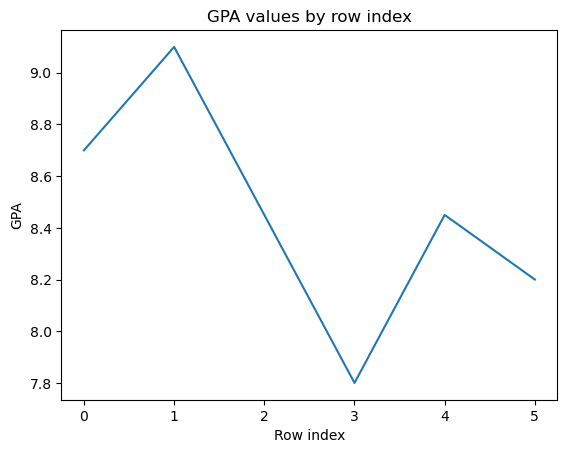

In [22]:

# Simple GPA plot
ax1 = students["gpa"].plot(title="GPA values by row index")
ax1.set_xlabel("Row index")
ax1.set_ylabel("GPA")


Text(0, 0.5, 'GPA')

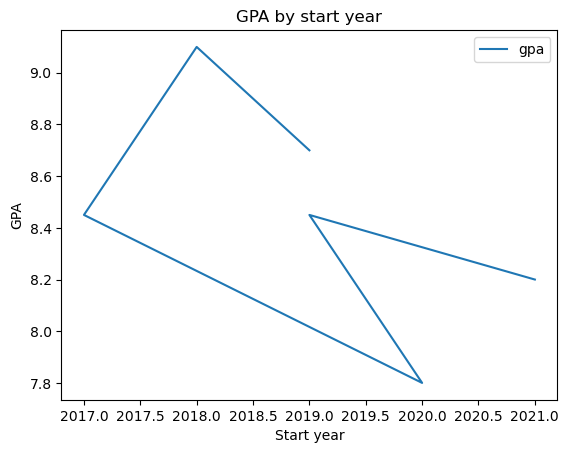

In [23]:

# Plot GPA by start_year (scatter-like using line plot)
ax2 = students.set_index("start_year")[["gpa"]].plot(title="GPA by start year")
ax2.set_xlabel("Start year")
ax2.set_ylabel("GPA")


Text(0, 0.5, 'Number of publications')

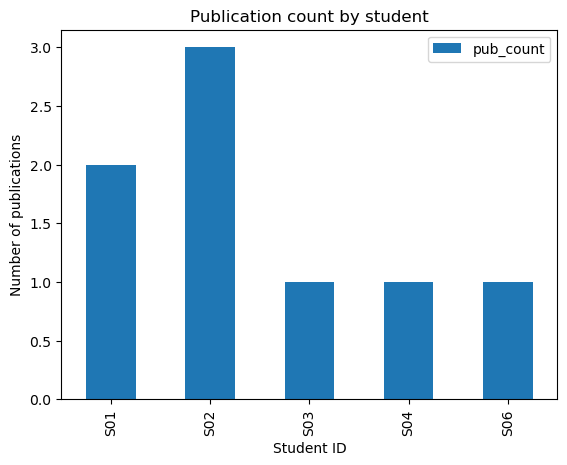

In [24]:

# Bar plot for publication counts by student
ax3 = pub_counts.set_index("student_id")[["pub_count"]].plot(kind="bar", title="Publication count by student")
ax3.set_xlabel("Student ID")
ax3.set_ylabel("Number of publications")


In [25]:

# Export results
students.to_csv("students_clean.csv", index=False)
pub_counts.to_excel("pub_counts.xlsx")
"Exported students_clean.csv and pub_counts.xlsx"


'Exported students_clean.csv and pub_counts.xlsx'

## Part G – Additional Short Tasks

In [26]:

# Distinct supervisors
unique_supervisors = students["supervisor"].unique()
unique_supervisors


array(['Prof. Muller', 'Prof. Chen', 'Prof. Rossi', 'Prof. Novak'],
      dtype=object)

In [27]:

# Map each student name to status using iterrows
name_status = {}
for idx, row in students.iterrows():
    name_status[row["name"]] = row["status"]

name_status


{'Alice smith': 'active',
 'Bob jones': 'active',
 'Carol lee': 'graduated',
 "David o'neil": 'active',
 'Erin green': 'withdrawn',
 'Frank stone': 'active'}

In [28]:

# Compare two Series using Series.equals
s1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
s2 = pd.Series([1, 2, 3], index=["a", "b", "c"])
s3 = pd.Series([1, 2, 4], index=["a", "b", "c"])

equals_1_2 = s1.equals(s2)
equals_1_3 = s1.equals(s3)

equals_1_2, equals_1_3


(True, False)